# Irish weather analisys

## Irish weather  

Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_weather = pd.read_csv('./data/hrly_Irish_weather.csv', dtype=str)
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4660423 entries, 0 to 4660422
Data columns (total 18 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   county     object
 1   station    object
 2   latitude   object
 3   longitude  object
 4   date       object
 5   rain       object
 6   temp       object
 7   wetb       object
 8   dewpt      object
 9   vappr      object
 10  rhum       object
 11  msl        object
 12  wdsp       object
 13  wddir      object
 14  sun        object
 15  vis        object
 16  clht       object
 17  clamt      object
dtypes: object(18)
memory usage: 640.0+ MB


In [3]:
df_weather.head()

,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
0,Galway,ATHENRY,53.288999999999994,-8.786,26-jun-2011 01:00,0.0,15.3,14.5,13.9,15.8,90,1016.0,8,190,NaN,NaN,NaN,NaN
1,Galway,ATHENRY,53.288999999999994,-8.786,26-jun-2011 02:00,0.0,14.7,13.7,12.9,14.9,89,1015.8,7,190,NaN,NaN,NaN,NaN
2,Galway,ATHENRY,53.288999999999994,-8.786,26-jun-2011 03:00,0.0,14.3,13.4,12.6,14.6,89,1015.5,6,190,NaN,NaN,NaN,NaN
3,Galway,ATHENRY,53.288999999999994,-8.786,26-jun-2011 04:00,0.0,14.4,13.6,12.8,14.8,90,1015.3,7,180,NaN,NaN,NaN,NaN
4,Galway,ATHENRY,53.288999999999994,-8.786,26-jun-2011 05:00,0.0,14.4,13.5,12.7,14.7,89,1015.1,6,190,NaN,NaN,NaN,NaN


Drop unnecessary columns

In [4]:
df_weather.drop(['wetb', 'dewpt', 'vappr', 'wddir', 'clht', 'clamt', 'latitude', 'longitude'], axis=1, inplace=True)
df_weather.head()

,county,station,date,rain,temp,rhum,msl,wdsp,sun,vis
0,Galway,ATHENRY,26-jun-2011 01:00,0.0,15.3,90,1016.0,8,NaN,NaN
1,Galway,ATHENRY,26-jun-2011 02:00,0.0,14.7,89,1015.8,7,NaN,NaN
2,Galway,ATHENRY,26-jun-2011 03:00,0.0,14.3,89,1015.5,6,NaN,NaN
3,Galway,ATHENRY,26-jun-2011 04:00,0.0,14.4,90,1015.3,7,NaN,NaN
4,Galway,ATHENRY,26-jun-2011 05:00,0.0,14.4,89,1015.1,6,NaN,NaN


Rename column to more human-readable

In [5]:
df_weather.rename(columns={'temp': 'temperature', '' 'rhum':'relative_humidity', 'wdsp': 'wind_speed', 'vis': 'visibility'}, inplace=True)
df_weather.head()

,county,station,date,rain,temperature,relative_humidity,msl,wind_speed,sun,visibility
0,Galway,ATHENRY,26-jun-2011 01:00,0.0,15.3,90,1016.0,8,NaN,NaN
1,Galway,ATHENRY,26-jun-2011 02:00,0.0,14.7,89,1015.8,7,NaN,NaN
2,Galway,ATHENRY,26-jun-2011 03:00,0.0,14.3,89,1015.5,6,NaN,NaN
3,Galway,ATHENRY,26-jun-2011 04:00,0.0,14.4,90,1015.3,7,NaN,NaN
4,Galway,ATHENRY,26-jun-2011 05:00,0.0,14.4,89,1015.1,6,NaN,NaN


Fill Nan values

In [6]:
df_weather['rain'].fillna(0, inplace=True)
df_weather['temperature'].fillna(0, inplace=True)
df_weather['relative_humidity'].fillna(0, inplace=True)
df_weather['wind_speed'].fillna(0, inplace=True)
df_weather['msl'].fillna(0, inplace=True)
df_weather['sun'].fillna(0, inplace=True)
df_weather['visibility'].fillna(0, inplace=True)

df_weather['rain'].replace(' ', 0, inplace=True)
df_weather['temperature'].replace(' ', 0, inplace=True)
df_weather['relative_humidity'].replace(' ', 0, inplace=True)
df_weather['wind_speed'].replace(' ', 0, inplace=True)
df_weather['msl'].replace(' ', 0, inplace=True)
df_weather['sun'].replace(' ', 0, inplace=True)
df_weather['visibility'].replace(' ', 0, inplace=True)

In [7]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4660423 entries, 0 to 4660422
Data columns (total 10 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   county             object
 1   station            object
 2   date               object
 3   rain               object
 4   temperature        object
 5   relative_humidity  object
 6   msl                object
 7   wind_speed         object
 8   sun                object
 9   visibility         object
dtypes: object(10)
memory usage: 355.6+ MB


Cast column data types

In [8]:
df_weather['rain'] = pd.to_numeric(df_weather['rain'])
df_weather['temperature'] = pd.to_numeric(df_weather['temperature'])
df_weather['relative_humidity'] = pd.to_numeric(df_weather['relative_humidity'])
df_weather['msl'] = pd.to_numeric(df_weather['msl'])
df_weather['wind_speed'] = pd.to_numeric(df_weather['wind_speed'])
df_weather['sun'] = pd.to_numeric(df_weather['sun'])
df_weather['visibility'] = pd.to_numeric(df_weather['visibility'])

In [9]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4660423 entries, 0 to 4660422
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   county             object 
 1   station            object 
 2   date               object 
 3   rain               float64
 4   temperature        float64
 5   relative_humidity  int64  
 6   msl                float64
 7   wind_speed         int64  
 8   sun                float64
 9   visibility         int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 355.6+ MB


Format date 

In [10]:
df_weather['date'] = pd.to_datetime(df_weather['date'], format="%d-%b-%Y %H:%M")

In [11]:
df_weather.head()

,county,station,date,rain,temperature,relative_humidity,msl,wind_speed,sun,visibility
0,Galway,ATHENRY,2011-06-26 01:00:00,0.0,15.3,90,1016.0,8,0.0,0
1,Galway,ATHENRY,2011-06-26 02:00:00,0.0,14.7,89,1015.8,7,0.0,0
2,Galway,ATHENRY,2011-06-26 03:00:00,0.0,14.3,89,1015.5,6,0.0,0
3,Galway,ATHENRY,2011-06-26 04:00:00,0.0,14.4,90,1015.3,7,0.0,0
4,Galway,ATHENRY,2011-06-26 05:00:00,0.0,14.4,89,1015.1,6,0.0,0


Add year, quarter, month and day columns and fill them

In [12]:
df_weather['year'] = df_weather['date'].dt.year
df_weather['quarter'] = df_weather['date'].dt.quarter
df_weather['month'] = df_weather['date'].dt.month
df_weather['day'] = df_weather['date'].dt.day

df_weather.head(5)

,county,station,date,rain,temperature,relative_humidity,msl,wind_speed,sun,visibility,year,quarter,month,day
0,Galway,ATHENRY,2011-06-26 01:00:00,0.0,15.3,90,1016.0,8,0.0,0,2011,2,6,26
1,Galway,ATHENRY,2011-06-26 02:00:00,0.0,14.7,89,1015.8,7,0.0,0,2011,2,6,26
2,Galway,ATHENRY,2011-06-26 03:00:00,0.0,14.3,89,1015.5,6,0.0,0,2011,2,6,26
3,Galway,ATHENRY,2011-06-26 04:00:00,0.0,14.4,90,1015.3,7,0.0,0,2011,2,6,26
4,Galway,ATHENRY,2011-06-26 05:00:00,0.0,14.4,89,1015.1,6,0.0,0,2011,2,6,26


Calculate average values of temperature, rain and wind speed in every county

In [255]:
county_agg = df_weather.groupby('county').mean()[['temperature', 'rain', 'wind_speed']].sort_values(by=['temperature'])
county_agg

,temperature,rain,wind_speed
county,,,
Sligo,9.301889,0.140855,0.000000
Cavan,9.302259,0.116417,6.558218
Roscommon,9.353235,0.122882,7.065596
Westmeath,9.355849,0.112157,6.790722
Meath,9.391840,0.100430,7.983074
Tipperary,9.516636,0.107226,8.305176
Mayo,9.653992,0.151812,10.124972
Carlow,9.766821,0.094802,7.359015
Dublin,9.809175,0.087849,8.466335


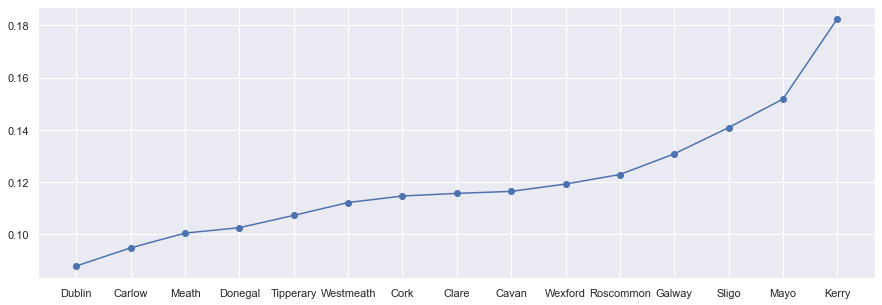

In [264]:
fig = plt.figure(figsize=(15, 5))
plt.plot(county_agg['rain'].sort_values(ascending=True), '-o')

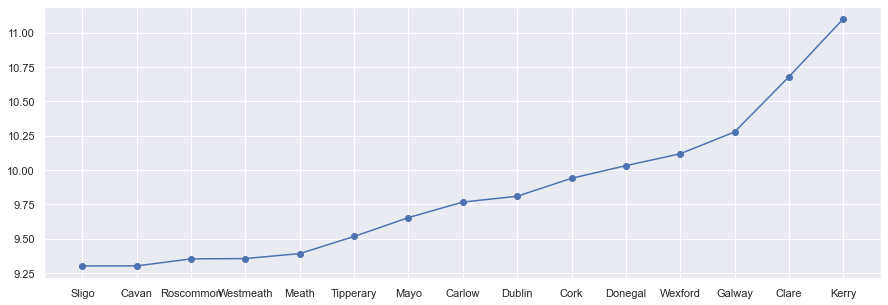

In [265]:
fig = plt.figure(figsize=(15, 5))
plt.plot(county_agg['temperature'].sort_values(ascending=True), '-o')

Calculate average values of temperature, rain and wind speed in Cork and Dublin counties

In [15]:
cd = df_weather.loc[df_weather['county'].isin(['Cork', 'Dublin'])]

In [16]:
cd.groupby('county').mean()[['temperature', 'rain', 'wind_speed']].sort_values(by=['temperature'])

,temperature,rain,wind_speed
county,,,
Dublin,9.809175,0.087849,8.466335
Cork,9.939941,0.114646,9.212620


Create data frame with Cork weater data

In [17]:
temp_cork = df_weather.loc[df_weather['county']=='Cork'].groupby(['year']).agg({'temperature':[np.mean, np.max, np.min],
                                                                        'rain':[np.mean, np.max, np.min], 
                                                                        'wind_speed':[np.mean, np.max, np.min]})
temp_cork

temperature                  rain            wind_speed          
            mean  amax  amin      mean  amax amin       mean amax amin
year                                                                  
1990   10.577563  24.4  -2.2  0.103961  11.3  0.0  12.517123   51    0
1991    9.670848  24.5  -4.6  0.128730   9.2  0.0  10.050451   42    0
1992    9.576434  21.9  -2.4  0.115870  11.2  0.0   9.873520   38    1
1993    4.936012  22.3  -2.0  0.127839  12.9  0.0  10.908376   48    0
1994    4.879378  22.4  -2.4  0.140009  11.2  0.0  11.559499   51    0
1995    5.756769  27.4  -3.1  0.116570  17.8  0.0  11.201256   47    0
1996    5.872636  22.7  -3.1  0.137242  11.6  0.0  11.190705   54    0
1997   10.687351  23.0  -4.1  0.123443  16.6  0.0  11.135910   62    0
1998   10.450437  22.8  -2.2  0.136789  18.5  0.0  11.460871   48    0
1999   10.446718  25.8  -3.4  0.115961  20.0  0.0  11.220801   46    0
2000   10.077642  23.2  -3.5  0.113513  18.0  0.0   5.541431   40    0
2001   10.256082  22.9  -3.9  0.061814  15.4  0.0   4.668063   36    0
2002   10.460588  23.1  -0.7  0.088162  17.2  0.0   5.017255   35    0
2003    9.879813  25.2  -5.2  0.055402   5.9  0.0   4.669587   30    0
2004   10.469438  24.9  -6.9  0.083987  12.9  0.0   6.261181   37    0
2005   10.679813  28.3  -4.8  0.090138  23.4  0.0   6.927490   42    0
2006   10.760736  28.0  -6.1  0.092603  22.4  0.0   6.988116   45    0
2007   11.030217  23.7  -3.9  0.081136  17.0  0.0   6.711175   48    0
2008   10.224580  27.6  -4.9  0.120262  14.5  0.0   9.102990   42    0
2009   10.106687  24.4  -7.3  0.154272  12.0  0.0   9.961815   49    0
2010    9.328333  23.3 -12.3  0.098619  13.3  0.0   8.863870   39    0
2011   10.337922  24.3  -7.5  0.100137  11.4  0.0  10.086615   39    0
2012   10.262813  24.3  -4.4  0.125413  18.3  0.0   9.830430   40    0
2013   10.301090  28.3  -4.8  0.121527  11.2  0.0  10.286558   47    0
2014   10.823938  25.7  -3.3  0.138436  14.4  0.0  10.089869   54    0
2015   10.352092  21.6  -3.8  0.146764  14.8  0.0  10.766010   48    0
2016   10.453939  24.6  -5.8  0.118932  14.9  0.0   9.858322   49    0
2017   10.757840  26.6  -5.6  0.121647  10.7  0.0   9.968636   59    0
2018   10.666470  29.8  -6.9  0.134361  12.4  0.0  10.023459   44    0
2019   10.675405  27.0  -3.7  0.131356  17.6  0.0  10.363927   46    0
2020    8.515018  21.7  -4.9  0.119122   7.6  0.0  11.297753   51    0

Create data frame with Dublin weater data

In [18]:
temp_dublin = df_weather.loc[df_weather['county']=='Dublin'].groupby(['year']).agg({'temperature':[np.mean, np.max, np.min],
                                                                        'rain':[np.mean, np.max, np.min], 
                                                                        'wind_speed':[np.mean, np.max, np.min]})
temp_dublin

temperature                  rain            wind_speed          
            mean  amax  amin      mean  amax amin       mean amax amin
year                                                                  
1990   10.214663  29.2  -3.7  0.085046  15.3  0.0  11.900342   46    0
1991    9.622078  25.7  -7.0  0.077009  11.6  0.0  11.021347   45    0
1992    9.721067  24.4  -7.3  0.070196  20.4  0.0  10.765084   36    0
1993    9.456924  22.6  -4.3  0.102740  13.1  0.0  10.496290   50    0
1994    9.546124  24.1  -5.0  0.091050  14.8  0.0  11.307820   37    0
1995   10.102591  28.2  -7.8  0.080080  16.3  0.0  10.629909   42    0
1996    9.116479  25.1  -5.6  0.087432   9.6  0.0  10.376082   37    0
1997   10.193533  24.3  -4.1  0.078425   9.1  0.0  10.045034   49    0
1998    9.980291  25.1  -5.5  0.094355   7.2  0.0  10.877397   41    0
1999    9.966176  26.5  -6.1  0.086130  12.6  0.0  10.766895   39    0
2000    9.554582  27.1  -7.9  0.097416  13.5  0.0  10.316655   38    0
2001    9.498499  26.4  -8.0  0.069047  14.0  0.0   9.423459   35    0
2002   10.095531  23.0  -6.0  0.120445  11.3  0.0  10.247260   40    0
2003   10.085474  27.4  -5.1  0.073533   9.2  0.0   9.639783   35    0
2004    9.970310  25.4  -6.4  0.083959  13.9  0.0  10.494023   39    0
2005   10.097887  25.8  -4.8  0.075361   6.3  0.0   9.815539   42    0
2006    9.806392  30.3  -7.1  0.078277   6.6  0.0   9.141413   37    0
2007   10.209136  23.2  -5.4  0.087951  16.4  0.0   6.850843   45    0
2008    9.602630  23.1  -7.0  0.110181  24.1  0.0   7.340468   41    0
2009    9.730361  25.0  -8.2  0.104011  26.5  0.0   7.033409   42    0
2010    8.654030  24.4 -15.4  0.078474  12.5  0.0   5.803691   34    0
2011   10.196644  25.5  -6.1  0.078756  18.6  0.0   7.185236   36    0
2012    9.569399  23.9  -5.6  0.100250  10.8  0.0   6.726928   37    0
2013    9.678425  27.9  -5.8  0.082295  17.0  0.0   6.905327   37    0
2014   10.245400  24.6  -4.6  0.104970  16.5  0.0   6.861149   42    0
2015    9.678097  25.4  -7.7  0.097770   8.6  0.0   7.295129   37    0
2016    9.996357  27.0  -5.0  0.081428  17.4  0.0   6.572253   37    0
2017   10.273809  28.3  -6.2  0.079852  13.5  0.0   6.951027   44    0
2018   10.189022  27.5  -4.9  0.077576   8.6  0.0   6.561377   36    0
2019   10.059189  26.5  -5.6  0.097371  13.3  0.0   6.197336   34    0
2020    8.020426  25.4  -3.4  0.065881  13.1  0.0   7.112725   35    0

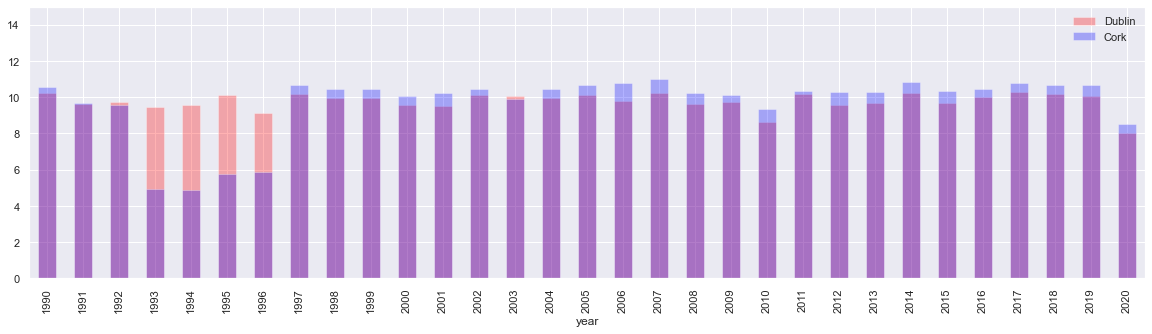

In [258]:
fig = plt.figure(figsize=(20, 5))
plt.ylim(0, 15)
temp_dublin['temperature']['mean'].plot(kind="bar", color='red', alpha=0.3, label='Dublin')
temp_cork['temperature']['mean'].plot(kind="bar",color='blue', alpha=0.3, label='Cork')
plt.legend(loc='upper right')
plt.show()

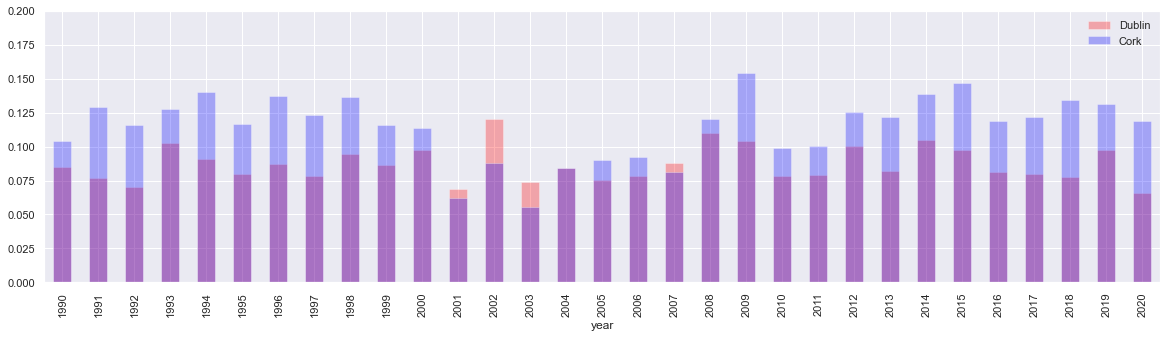

In [270]:
fig = plt.figure(figsize=(20, 5))
plt.ylim(0, 0.2)
temp_dublin['rain']['mean'].plot(kind="bar", color='red', alpha=0.3, label='Dublin')
temp_cork['rain']['mean'].plot(kind="bar",color='blue', alpha=0.3, label='Cork')
plt.legend(loc='upper right')
plt.show()

Compare the same parameters but only data taken from Dublin and Cork airport stations

In [259]:
dublin_year_summary = df_weather.loc[df_weather['station']=='DUBLIN AIRPORT'].groupby(by=['year']).agg({'temperature': np.mean,
                                                                        'rain': np.sum, 
                                                                        'wind_speed': np.max, 
                                                                         'sun': np.sum})
cork_year_summary = df_weather.loc[df_weather['station']=='CORK AIRPORT'].groupby(by=['year']).agg({'temperature': np.mean,
                                                                        'rain': np.sum, 
                                                                        'wind_speed': np.max, 
                                                                        'sun': np.sum})

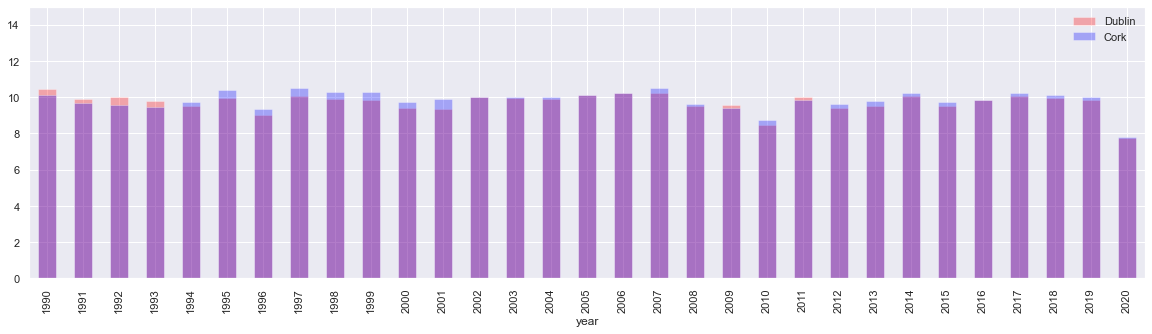

In [260]:
fig = plt.figure(figsize=(20, 5))
plt.ylim(0, 15)
dublin_year_summary['temperature'].plot(kind="bar", color='red', alpha=0.3, label='Dublin')
cork_year_summary['temperature'].plot(kind="bar",color='blue', alpha=0.3, label='Cork')
plt.legend(loc='upper right')
plt.show()

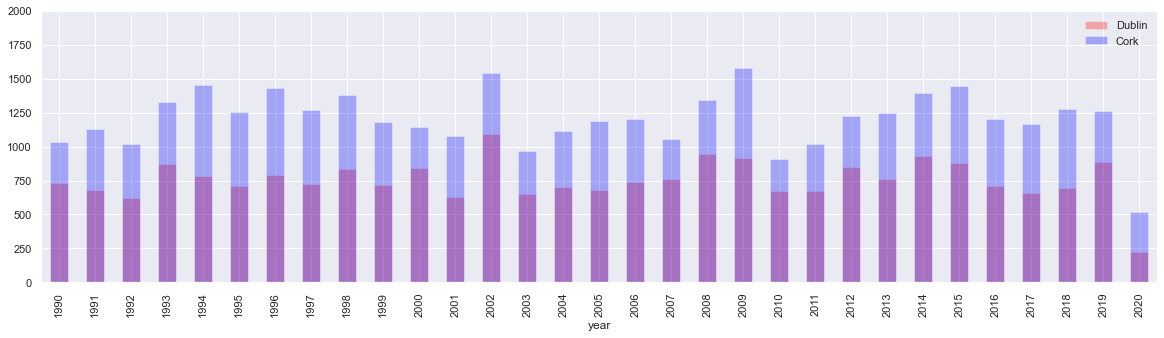

In [261]:
fig = plt.figure(figsize=(20, 5))
plt.ylim(0, 2000)
dublin_year_summary['rain'].plot(kind="bar", color='red', alpha=0.3, label='Dublin')
cork_year_summary['rain'].plot(kind="bar",color='blue', alpha=0.3, label='Cork')
plt.legend(loc='upper right')
plt.show()

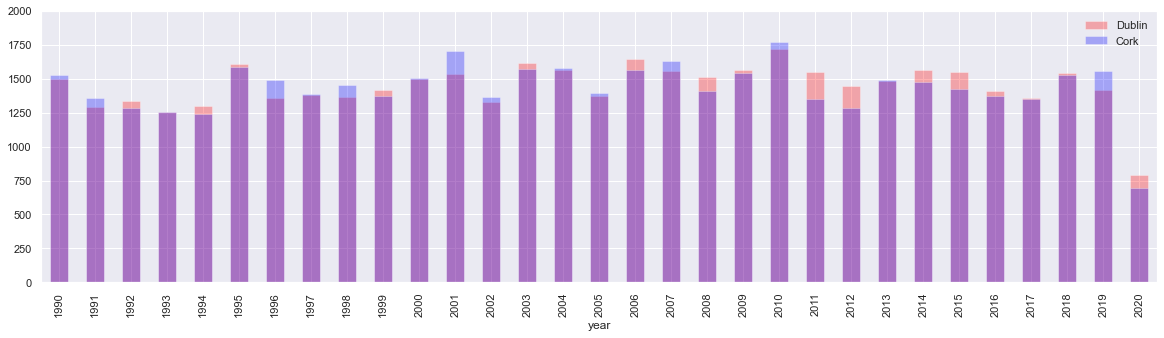

In [263]:
fig = plt.figure(figsize=(20, 5))
plt.ylim(0, 2000)
dublin_year_summary['sun'].plot(kind="bar", color='red', alpha=0.3, label='Dublin')
cork_year_summary['sun'].plot(kind="bar",color='blue', alpha=0.3, label='Cork')
plt.legend(loc='upper right')
plt.show()

#  Weather and car accidents correlation

Hypothesis: count of car accident is bigger in rainy days

Load data about crimes in Ireland

In [31]:
df_crimes = pd.read_csv('./data/IRELAND_CRIME_GARDA_DIVISION_wise_2003-2019.csv', dtype=str)
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   REGION           1624 non-null   object
 1   GARDA DIVISION   1624 non-null   object
 2   OFFENCE CODE     1624 non-null   object
 3   OFFENCE          1624 non-null   object
 4   TYPE OF OFFENCE  1624 non-null   object
 5   2003Q1           1624 non-null   object
 6   2003Q2           1624 non-null   object
 7   2003Q3           1624 non-null   object
 8   2003Q4           1624 non-null   object
 9   2004Q1           1624 non-null   object
 10  2004Q2           1624 non-null   object
 11  2004Q3           1624 non-null   object
 12  2004Q4           1624 non-null   object
 13  2005Q1           1624 non-null   object
 14  2005Q2           1624 non-null   object
 15  2005Q3           1624 non-null   object
 16  2005Q4           1624 non-null   object
 17  2006Q1           1624 non-null   

In [32]:
df_crimes_cnt = df_crimes.iloc[:, 5:]

Covert offence code to numeric

In [33]:
df_crimes['OFFENCE CODE'] = pd.to_numeric(df_crimes['OFFENCE CODE'])
df_crimes.head()

,REGION,GARDA DIVISION,OFFENCE CODE,OFFENCE,TYPE OF OFFENCE,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,...,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3
0,NORTHERN REGION,CAVAN/MONAGHAN,111,Murder,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,NORTHERN REGION,CAVAN/MONAGHAN,112,Manslaughter,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,NORTHERN REGION,CAVAN/MONAGHAN,113,Infanticide,HOMICIDE OFFENCES,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NORTHERN REGION,CAVAN/MONAGHAN,12,Dangerous driving leading to death,HOMICIDE OFFENCES,1,0,1,0,0,...,1,1,1,0,0,0,1,0,0,0
4,NORTHERN REGION,CAVAN/MONAGHAN,21,Rape and sexual assault,SEXUAL OFFENCES,24,15,5,5,14,...,16,8,14,23,21,13,23,19,20,17


Select only car accidents in Dublin

In [37]:
df_drive_accidents_dublin = df_crimes[(df_crimes['OFFENCE CODE'].isin([12, 411, 425])) & (df_crimes['REGION']=='DUBLIN METROPOLITAN REGION')]

In [38]:
df_drive_accidents_dublin = df_drive_accidents_dublin.iloc[:, 5:]
df_drive_accidents_dublin

,2003Q1,2003Q2,2003Q3,2003Q4,2004Q1,2004Q2,2004Q3,2004Q4,2005Q1,2005Q2,...,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3
1279,0,0,0,0,5,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1287,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1294,3,1,5,5,3,3,2,6,1,4,...,3,1,3,1,2,5,1,2,3,3
1337,1,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
1345,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1352,2,3,0,6,2,4,1,3,4,0,...,2,2,2,2,2,4,6,0,2,0
1395,0,5,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,0
1403,1,0,0,0,0,1,0,1,0,0,...,0,0,0,1,2,1,0,0,0,0
1410,2,4,2,2,1,3,1,1,0,4,...,2,4,3,2,2,9,4,3,5,5
1453,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


Cast data to integer and transpose matrix

In [39]:
df_drive_accidents_dublin = df_drive_accidents_dublin.astype('int32').T

Add separate year and quarter columns and fill them with data

In [40]:
df_drive_accidents_dublin['year'] = pd.to_numeric(df_drive_accidents_dublin.index.str[0:4])
df_drive_accidents_dublin['quarter'] = pd.to_numeric(df_drive_accidents_dublin.index.str[5:7])
df_drive_accidents_dublin.reset_index(drop=True, inplace=True)


In [272]:
df_drive_accidents_dublin.head()

,1279,1287,1294,1337,1345,1352,1395,1403,1410,1453,1461,1468,1511,1519,1526,1569,1577,1584,year,quarter
0,0,0,3,1,0,2,0,1,2,0,0,2,0,0,0,0,1,7,2003,1
1,0,0,1,0,0,3,5,0,4,0,1,0,0,0,1,0,0,3,2003,2
2,0,0,5,0,0,0,1,0,2,0,1,4,0,0,0,0,1,3,2003,3
3,0,0,5,1,0,6,0,0,2,1,0,0,0,0,3,2,0,3,2003,4
4,5,0,3,0,0,2,0,0,1,0,1,5,0,0,2,0,2,1,2004,1


Summarize all car accidents in every quarter

In [41]:
df_drive_accidents_dublin.iloc[:, :-2].sum(axis=1).to_frame()

,0
0,19
1,18
2,17
3,23
4,22
...,...
62,38
63,32
64,24
65,30


In [42]:
dublin_drive_accidents_summary = pd.concat([df_drive_accidents_dublin.iloc[:, :-2].sum(axis=1).to_frame(), df_drive_accidents_dublin.iloc[:, -2:]], axis=1)
dublin_drive_accidents_summary

,0,year,quarter
0,19,2003,1
1,18,2003,2
2,17,2003,3
3,23,2003,4
4,22,2004,1
...,...,...,...
62,38,2018,3
63,32,2018,4
64,24,2019,1
65,30,2019,2


Rename column with summary accident count

In [43]:
dublin_drive_accidents_summary.rename(columns = {dublin_drive_accidents_summary.columns[0]:'accident_cnt'}, inplace = True)
dublin_drive_accidents_summary.head()

,accident_cnt,year,quarter
0,19,2003,1
1,18,2003,2
2,17,2003,3
3,23,2003,4
4,22,2004,1


Select weather data between 2003 and 2009 and group it by quarters

In [44]:
dublin_weather_summary = df_weather.loc[(df_weather['date']>='2003-01-01') & (df_weather['date']<'2019-10-01') & (df_weather['station']=='DUBLIN AIRPORT')].groupby(by=['year', 'quarter']).agg({'temperature': np.mean,
                                                                        'rain': np.sum, 
                                                                        'wind_speed': np.mean, 
                                                                         'sun': np.sum, 'year': np.max, 'quarter': np.max})

In [45]:
dublin_weather_summary

temperature   rain  wind_speed    sun  year  quarter
year quarter                                                      
2003 1           5.751528  110.8   11.132870  350.1  2003        1
     2          11.213599  221.2   10.107601  531.8  2003        2
     3          15.088451   99.5    8.151721  472.3  2003        3
     4           7.645562  222.0   10.718750  260.6  2003        4
2004 1           5.633929  146.0   11.391484  324.5  2004        1
...                   ...    ...         ...    ...   ...      ...
2018 3          14.824230  131.8    8.002717  440.2  2018        3
     4           8.662047  254.8    9.577446  201.3  2018        4
2019 1           6.683241  149.8   10.289815  291.8  2019        1
     2          10.490705  190.9    8.438645  422.5  2019        2
     3          14.887002  237.3    8.518116  484.3  2019        3

[67 rows x 6 columns]

Show cars accident graph and raind count in the same plot

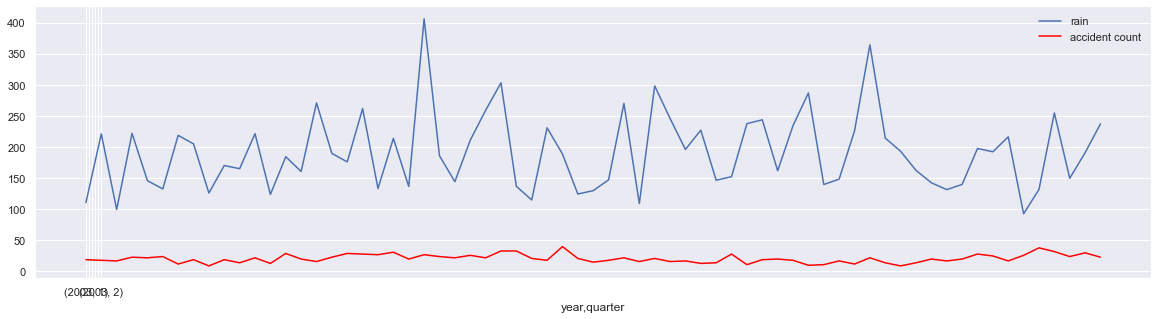

In [52]:
fig = plt.figure(figsize=(20, 5))
ax = plt.gca()
label_format = '{:,.0f}'
ax.set_xticks(ax.get_xticks().tolist())
ax.set_xticklabels([label_format.format(x) for x in ax.get_xticks().tolist()])
dublin_weather_summary['rain'].plot(label='rain')
dublin_drive_accidents_summary['accident_cnt'].plot(label='accident count', color='red')
plt.legend(loc='upper right')
plt.show()

**Conclusion**: the significant correlation between car accidents and rainfall count was not found but maybe if we had more detail data about car accidents (by days) it shows us more correlation

## Rain prediction

Let's try to predict if it rains tomorrow in Dublin using logistic regression.

Look over weather dataset again

In [53]:
df_weather.head()

,county,station,date,rain,temperature,relative_humidity,msl,wind_speed,sun,visibility,year,quarter,month,day
0,Galway,ATHENRY,2011-06-26 01:00:00,0.0,15.3,90,1016.0,8,0.0,0,2011,2,6,26
1,Galway,ATHENRY,2011-06-26 02:00:00,0.0,14.7,89,1015.8,7,0.0,0,2011,2,6,26
2,Galway,ATHENRY,2011-06-26 03:00:00,0.0,14.3,89,1015.5,6,0.0,0,2011,2,6,26
3,Galway,ATHENRY,2011-06-26 04:00:00,0.0,14.4,90,1015.3,7,0.0,0,2011,2,6,26
4,Galway,ATHENRY,2011-06-26 05:00:00,0.0,14.4,89,1015.1,6,0.0,0,2011,2,6,26


Select only data from Dubln airport station

In [54]:
dublin_weather_by_days = df_weather.loc[df_weather['station']=='DUBLIN AIRPORT'].copy()
dublin_weather_by_days.head()

,county,station,date,rain,temperature,relative_humidity,msl,wind_speed,sun,visibility,year,quarter,month,day
1278447,Dublin,DUBLIN AIRPORT,1990-01-01 00:00:00,0.1,9.0,88,1008.3,10,0.0,7000,1990,1,1,1
1278448,Dublin,DUBLIN AIRPORT,1990-01-01 01:00:00,0.0,8.9,88,1007.7,12,0.0,7000,1990,1,1,1
1278449,Dublin,DUBLIN AIRPORT,1990-01-01 02:00:00,0.0,8.8,88,1007.1,14,0.0,5000,1990,1,1,1
1278450,Dublin,DUBLIN AIRPORT,1990-01-01 03:00:00,0.0,9.0,88,1007.1,17,0.0,6000,1990,1,1,1
1278451,Dublin,DUBLIN AIRPORT,1990-01-01 04:00:00,0.6,9.0,92,1007.1,15,0.0,9000,1990,1,1,1


Cut time from date

In [55]:
dublin_weather_by_days['date'] = pd.to_datetime(dublin_weather_by_days['date']).dt.date
dublin_weather_by_days

,county,station,date,rain,temperature,relative_humidity,msl,wind_speed,sun,visibility,year,quarter,month,day
1278447,Dublin,DUBLIN AIRPORT,1990-01-01,0.1,9.0,88,1008.3,10,0.0,7000,1990,1,1,1
1278448,Dublin,DUBLIN AIRPORT,1990-01-01,0.0,8.9,88,1007.7,12,0.0,7000,1990,1,1,1
1278449,Dublin,DUBLIN AIRPORT,1990-01-01,0.0,8.8,88,1007.1,14,0.0,5000,1990,1,1,1
1278450,Dublin,DUBLIN AIRPORT,1990-01-01,0.0,9.0,88,1007.1,17,0.0,6000,1990,1,1,1
1278451,Dublin,DUBLIN AIRPORT,1990-01-01,0.6,9.0,92,1007.1,15,0.0,9000,1990,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545059,Dublin,DUBLIN AIRPORT,2020-05-31,0.0,14.7,67,1023.8,6,0.7,50000,2020,2,5,31
1545060,Dublin,DUBLIN AIRPORT,2020-05-31,0.0,12.4,74,1024.2,3,0.0,50000,2020,2,5,31
1545061,Dublin,DUBLIN AIRPORT,2020-05-31,0.0,9.8,88,1024.5,2,0.0,50000,2020,2,5,31
1545062,Dublin,DUBLIN AIRPORT,2020-05-31,0.0,8.7,90,1024.4,3,0.0,50000,2020,2,5,31


Group data by days and calculate min, max and average values for every measure

In [56]:
dublin_weather_by_days = dublin_weather_by_days.groupby('date').agg({'temperature': [np.max, np.min, np.mean],
                                                                        'rain': np.sum, 
                                                                        'wind_speed': [np.max, np.min, np.mean], 
                                                                         'sun': np.sum, 'date': np.max})
dublin_weather_by_days

temperature                 rain wind_speed                  sun  \
                  amax amin       mean  sum       amax amin      mean   sum   
date                                                                          
1990-01-01         9.7  5.0   7.800000  1.3         17    1  4.708333   0.3   
1990-01-02        10.0  5.6   7.845833  5.3         20    2  9.500000   1.1   
1990-01-03         8.3  4.7   6.633333  7.7          9    0  2.666667   0.0   
1990-01-04        11.7  4.2   8.412500  0.1         14    0  6.500000   0.9   
1990-01-05        10.6  5.3   9.141667  0.2         13    0  4.750000   2.3   
...                ...  ...        ...  ...        ...  ...       ...   ...   
2020-05-28        20.3  7.9  15.150000  0.0         11    4  7.416667  14.2   
2020-05-29        20.2  9.3  15.750000  0.0         13    3  7.625000  14.2   
2020-05-30        20.7  7.2  14.791667  0.0         11    2  6.041667  14.2   
2020-05-31        19.1  7.1  14.662500  0.0         12    2  7.333333  15.0   
2020-06-01         7.8  7.8   7.800000  0.0          3    3  3.000000   0.0   

                  date  
                  amax  
date                    
1990-01-01  1990-01-01  
1990-01-02  1990-01-02  
1990-01-03  1990-01-03  
1990-01-04  1990-01-04  
1990-01-05  1990-01-05  
...                ...  
2020-05-28  2020-05-28  
2020-05-29  2020-05-29  
2020-05-30  2020-05-30  
2020-05-31  2020-05-31  
2020-06-01  2020-06-01  

[11110 rows x 9 columns]

In [58]:
dublin_weather_by_days.info

<bound method DataFrame.info of            temperature                 rain wind_speed                  sun  \
                  amax amin       mean  sum       amax amin      mean   sum   
date                                                                          
1990-01-01         9.7  5.0   7.800000  1.3         17    1  4.708333   0.3   
1990-01-02        10.0  5.6   7.845833  5.3         20    2  9.500000   1.1   
1990-01-03         8.3  4.7   6.633333  7.7          9    0  2.666667   0.0   
1990-01-04        11.7  4.2   8.412500  0.1         14    0  6.500000   0.9   
1990-01-05        10.6  5.3   9.141667  0.2         13    0  4.750000   2.3   
...                ...  ...        ...  ...        ...  ...       ...   ...   
2020-05-28        20.3  7.9  15.150000  0.0         11    4  7.416667  14.2   
2020-05-29        20.2  9.3  15.750000  0.0         13    3  7.625000  14.2   
2020-05-30        20.7  7.2  14.791667  0.0         11    2  6.041667  14.2   
2020-05-31        19

Add binary (0 or 1) rain value that shows if rain or not

In [59]:
dublin_weather_by_days['rain_today'] = np.where(dublin_weather_by_days['rain'] > 0, 1, 0)

In [67]:
dublin_weather_by_days.iloc[0][]

temperature  amax           9.7
             amin             5
             mean           7.8
rain         sum            1.3
wind_speed   amax            17
             amin             1
             mean       4.70833
sun          sum            0.3
date         amax    1990-01-01
rain_today                    1
Name: 1990-01-01, dtype: object

Drop all rows with Nan

In [ ]:
dublin_weather_by_days.dropna(inplace=True)

Add rain tomorrow column

In [128]:
dublin_weather_by_days['rain_tomorrow'] = 0
rain_today = dublin_weather_by_days['rain_today']
rain_today = rain_today.shift(periods=-1, fill_value=0)
dublin_weather_by_days['rain_tomorrow'] = rain_today

temperature                  rain wind_speed                   \
                  amax  amin       mean  sum       amax  amin       mean   
date                                                                       
1990-01-11        12.6  10.8  11.666667  0.0       26.0  14.0  18.041667   
1990-01-12        11.4   3.1   6.925000  0.7       30.0  10.0  14.625000   
1990-01-13         9.4   2.3   6.154167  0.0       19.0   5.0  10.583333   
1990-01-14        10.0   6.5   8.550000  1.1       26.0  14.0  18.041667   
1990-01-15        14.0  10.1  12.258333  1.5       28.0  12.0  21.583333   
...                ...   ...        ...  ...        ...   ...        ...   
1990-04-06        10.6   4.1   7.083333  0.0       11.0   1.0   6.583333   
1990-04-07        10.0   4.8   7.383333  0.0       12.0   2.0   7.166667   
1990-04-08        10.4   3.4   6.495833  0.0        5.0   0.0   2.250000   
1990-04-09        11.0   1.3   6.716667  0.3       16.0   1.0   8.583333   
1990-04-10        14.3   7.7  10.241667  0.2       25.0  11.0  19.083333   

             sun        date rain_today rain_tomorrow  
             sum        amax                           
date                                                   
1990-01-11   0.1  1990-01-11        0.0           1.0  
1990-01-12   4.9  1990-01-12        1.0           0.0  
1990-01-13   3.0  1990-01-13        0.0           1.0  
1990-01-14   1.8  1990-01-14        1.0           1.0  
1990-01-15   0.0  1990-01-15        1.0           1.0  
...          ...         ...        ...           ...  
1990-04-06   9.4  1990-04-06        0.0           0.0  
1990-04-07   7.1  1990-04-07        0.0           0.0  
1990-04-08  12.0  1990-04-08        0.0           1.0  
1990-04-09   0.2  1990-04-09        1.0           1.0  
1990-04-10   2.9  1990-04-10        1.0           0.0  

[90 rows x 11 columns]

Add test data data frame to no affect base data frame

In [129]:
ml_data = dublin_weather_by_days

Remove last row because we do not now if rains tomorrow

In [130]:
ml_data = ml_data[:-1]

Save data from rain tomorrow in separate data frame and drop column 'rain_tomorrow' from ml data frame

In [131]:
rain_tomorrow = ml_data['rain_tomorrow']
rain_tomorrow

date
1990-01-01    1.0
1990-01-02    1.0
1990-01-03    1.0
1990-01-04    1.0
1990-01-05    1.0
             ... 
2020-05-26    0.0
2020-05-27    0.0
2020-05-28    0.0
2020-05-29    0.0
2020-05-30    0.0
Name: rain_tomorrow, Length: 11108, dtype: float64

In [132]:
ml_data = ml_data.drop(['rain_tomorrow'], axis=1)
ml_data

temperature                  rain wind_speed                  sun  \
                  amax  amin       mean  sum       amax amin      mean   sum   
date                                                                           
1990-01-01         9.7   5.0   7.800000  1.3       17.0  1.0  4.708333   0.3   
1990-01-02        10.0   5.6   7.845833  5.3       20.0  2.0  9.500000   1.1   
1990-01-03         8.3   4.7   6.633333  7.7        9.0  0.0  2.666667   0.0   
1990-01-04        11.7   4.2   8.412500  0.1       14.0  0.0  6.500000   0.9   
1990-01-05        10.6   5.3   9.141667  0.2       13.0  0.0  4.750000   2.3   
...                ...   ...        ...  ...        ...  ...       ...   ...   
2020-05-26        17.8  11.4  14.533333  0.0        9.0  4.0  6.875000  10.4   
2020-05-27        18.6   7.1  13.858333  0.0       11.0  2.0  6.083333  13.3   
2020-05-28        20.3   7.9  15.150000  0.0       11.0  4.0  7.416667  14.2   
2020-05-29        20.2   9.3  15.750000  0.0       13.0  3.0  7.625000  14.2   
2020-05-30        20.7   7.2  14.791667  0.0       11.0  2.0  6.041667  14.2   

                  date rain_today  
                  amax             
date                               
1990-01-01  1990-01-01        1.0  
1990-01-02  1990-01-02        1.0  
1990-01-03  1990-01-03        1.0  
1990-01-04  1990-01-04        1.0  
1990-01-05  1990-01-05        1.0  
...                ...        ...  
2020-05-26  2020-05-26        0.0  
2020-05-27  2020-05-27        0.0  
2020-05-28  2020-05-28        0.0  
2020-05-29  2020-05-29        0.0  
2020-05-30  2020-05-30        0.0  

[11108 rows x 10 columns]

Drop date column

In [133]:
ml_data = ml_data.reset_index()
ml_data = ml_data.drop(['date'], axis=1)
ml_data.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


temperature                rain wind_speed                 sun rain_today
         amax amin      mean  sum       amax amin      mean  sum           
0         9.7  5.0  7.800000  1.3       17.0  1.0  4.708333  0.3        1.0
1        10.0  5.6  7.845833  5.3       20.0  2.0  9.500000  1.1        1.0
2         8.3  4.7  6.633333  7.7        9.0  0.0  2.666667  0.0        1.0
3        11.7  4.2  8.412500  0.1       14.0  0.0  6.500000  0.9        1.0
4        10.6  5.3  9.141667  0.2       13.0  0.0  4.750000  2.3        1.0

Normalize data

In [134]:
ml_data = (ml_data - np.min(ml_data)) / (np.max(ml_data) - np.min(ml_data))
ml_data.head()

temperature                          rain wind_speed                      \
         amax      amin      mean       sum       amax      amin      mean   
0    0.437126  0.544554  0.543977  0.014069   0.348837  0.038462  0.139386   
1    0.446108  0.564356  0.545545  0.057359   0.418605  0.076923  0.286445   
2    0.395210  0.534653  0.504063  0.083333   0.162791  0.000000  0.076726   
3    0.497006  0.518152  0.564932  0.001082   0.279070  0.000000  0.194373   
4    0.464072  0.554455  0.589879  0.002165   0.255814  0.000000  0.140665   

        sun rain_today  
        sum             
0  0.018868        1.0  
1  0.069182        1.0  
2  0.000000        1.0  
3  0.056604        1.0  
4  0.144654        1.0

Divide dataset for training and test

In [187]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(ml_data, rain_tomorrow, test_size=0.3, random_state=50)

In [188]:
x_train.info

<bound method DataFrame.info of       temperature                          rain wind_speed            \
             amax      amin      mean       sum       amax      amin   
2238     0.428144  0.554455  0.518460  0.061688   0.581395  0.500000   
2633     0.485030  0.574257  0.577619  0.002165   0.581395  0.423077   
3166     0.685629  0.742574  0.763079  0.000000   0.093023  0.038462   
1603     0.446108  0.636964  0.586885  0.006494   0.209302  0.153846   
4334     0.374251  0.432343  0.426230  0.003247   0.209302  0.192308   
...           ...       ...       ...       ...        ...       ...   
8324     0.497006  0.554455  0.550249  0.015152   0.465116  0.153846   
10206    0.254491  0.234323  0.259301  0.000000   0.255814  0.307692   
6253     0.431138  0.435644  0.478118  0.000000   0.255814  0.269231   
10123    0.694611  0.574257  0.720029  0.000000   0.232558  0.115385   
5600     0.619760  0.719472  0.699644  0.061688   0.255814  0.153846   

                      sun rain_

Teach model

In [243]:
from sklearn.linear_model import LogisticRegression

regr = LogisticRegression()

In [244]:
regr.fit(x_train, y_train)

LogisticRegression()

In [245]:
from sklearn.metrics import accuracy_score

print("Train accuracy = {}".format(accuracy_score(y_train, regr.predict(x_train))))
print("Test accuracy = {}".format(accuracy_score(y_test, regr.predict(x_test))))

Train accuracy = 0.6811575562700964
Test accuracy = 0.6753675367536753


Conclusion matrix

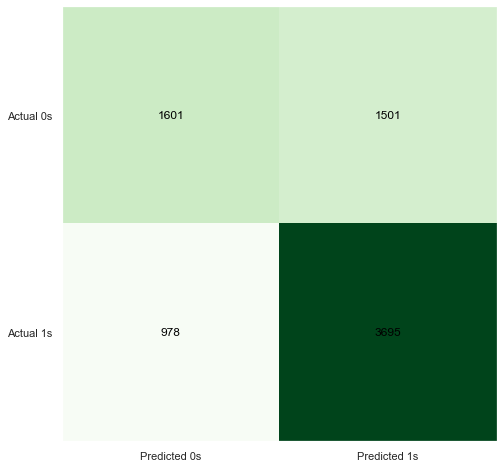

In [253]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_train, regr.predict(x_train))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(matrix, cmap='Greens')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='black')
plt.show()